**Confusion Matrix with KNN**

In [ ]:
#Basic Confusion Matrix
from sklearn.datasets import load_iris
#import load burada istedigin dataseti seciyorsun
from sklearn.neighbors import KNeighborsClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Lets read the data
myirisdata=load_iris()   #farkli bir dataset secersen sadece buradaki =den sonraki dataset atamasini degistiriyorsun
#istersen myirisdata diye degilde mydata adini ver dataseti degistir dur(baska bir sey yazmak istersen istedigini yazarsin daha guzel durur)
X=myirisdata['data']
Y=myirisdata['target']


mymachine=KNeighborsClassifier(n_neighbors=5,weights='uniform')
mymachine.fit(X,Y)

Y_Predicted=mymachine.predict(X)
# print(Y_Predicted)

print(confusion_matrix(Y,Y_Predicted))

print(precision_recall_fscore_support(Y,Y_Predicted))

# burada tum datayi kullandik

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
(array([1.        , 0.95918367, 0.94117647]), array([1.  , 0.94, 0.96]), array([1.        , 0.94949495, 0.95049505]), array([50, 50, 50]))


Bu matrisin yorumlanmasi: <br>
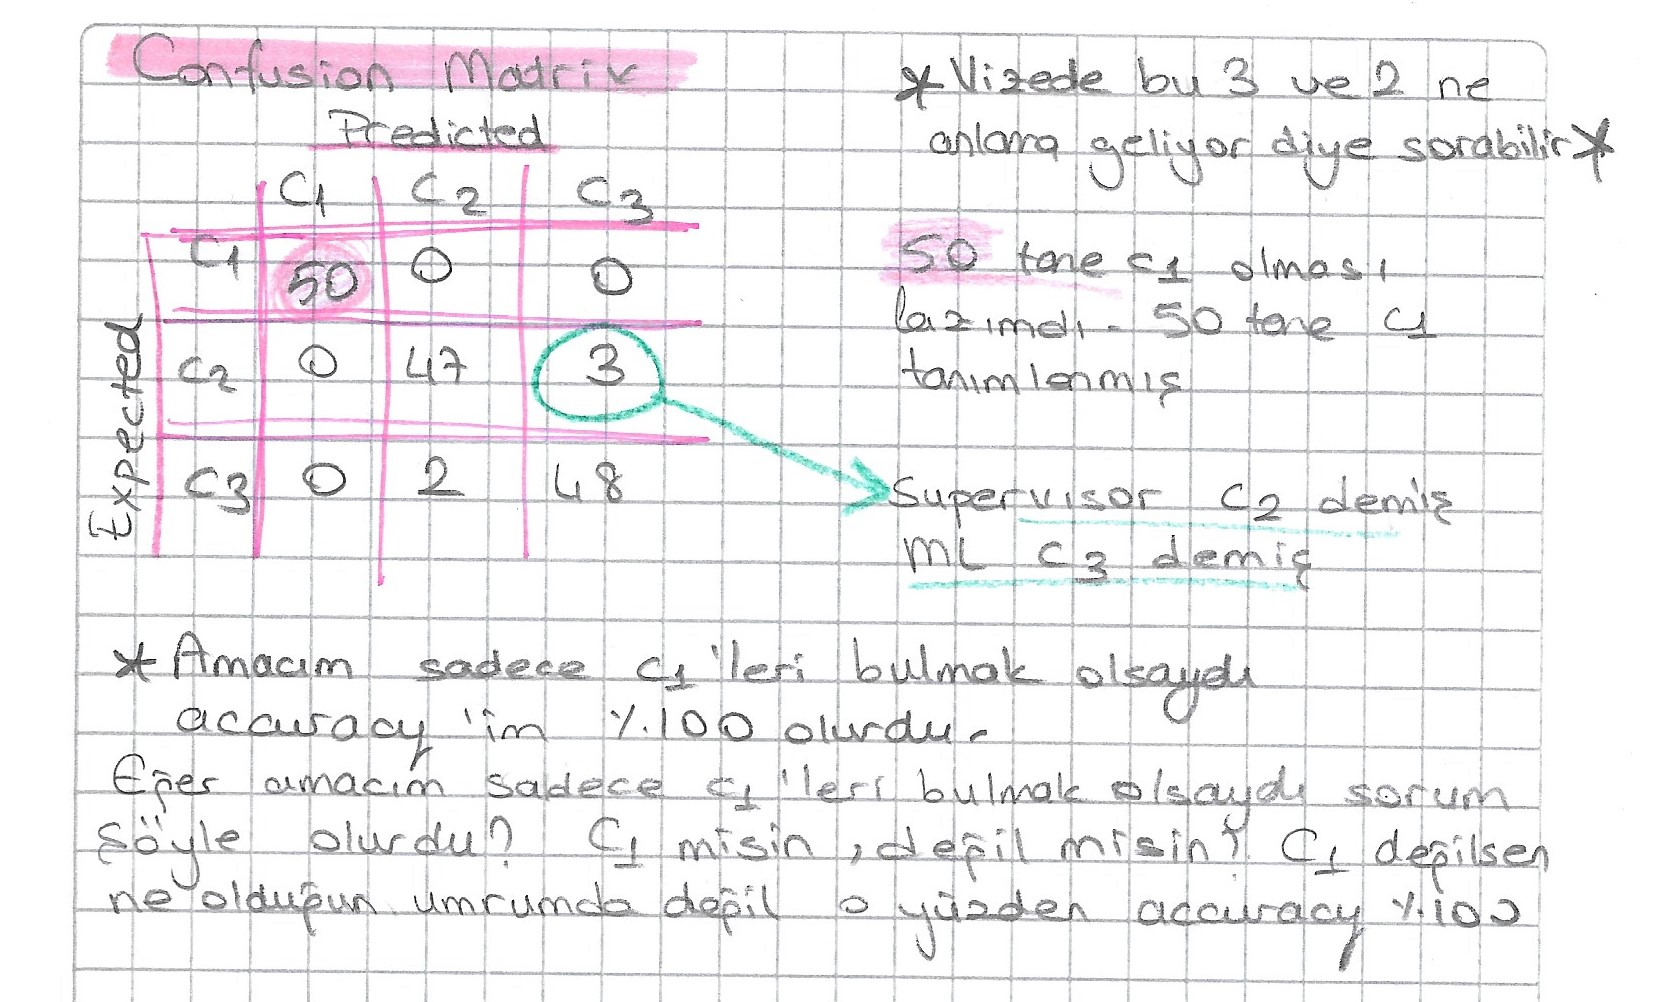

***from sklearn.metrics import precision_recall_fscore_support*** : <br>
Google'dan icerigine bakiyoruz. Sayfanin alt kisminda bunun nasil kullanilacaginin ornekleri var oradan inceleyebilirsin (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) <br>

*print(precision_recall_fscore_support(Y,Y_Predicted))* <br>
***output :*** <br>  [1. , 0.95918367, 0.94117647] --> precision <br>
[1.  , 0.94, 0.96] --> recall <br>
[1. , 0.94949495, 0.95049505] --> f1score<br>
[50, 50, 50] --> support

***Simdi datayi train-testing ayirip bakiyoruz***
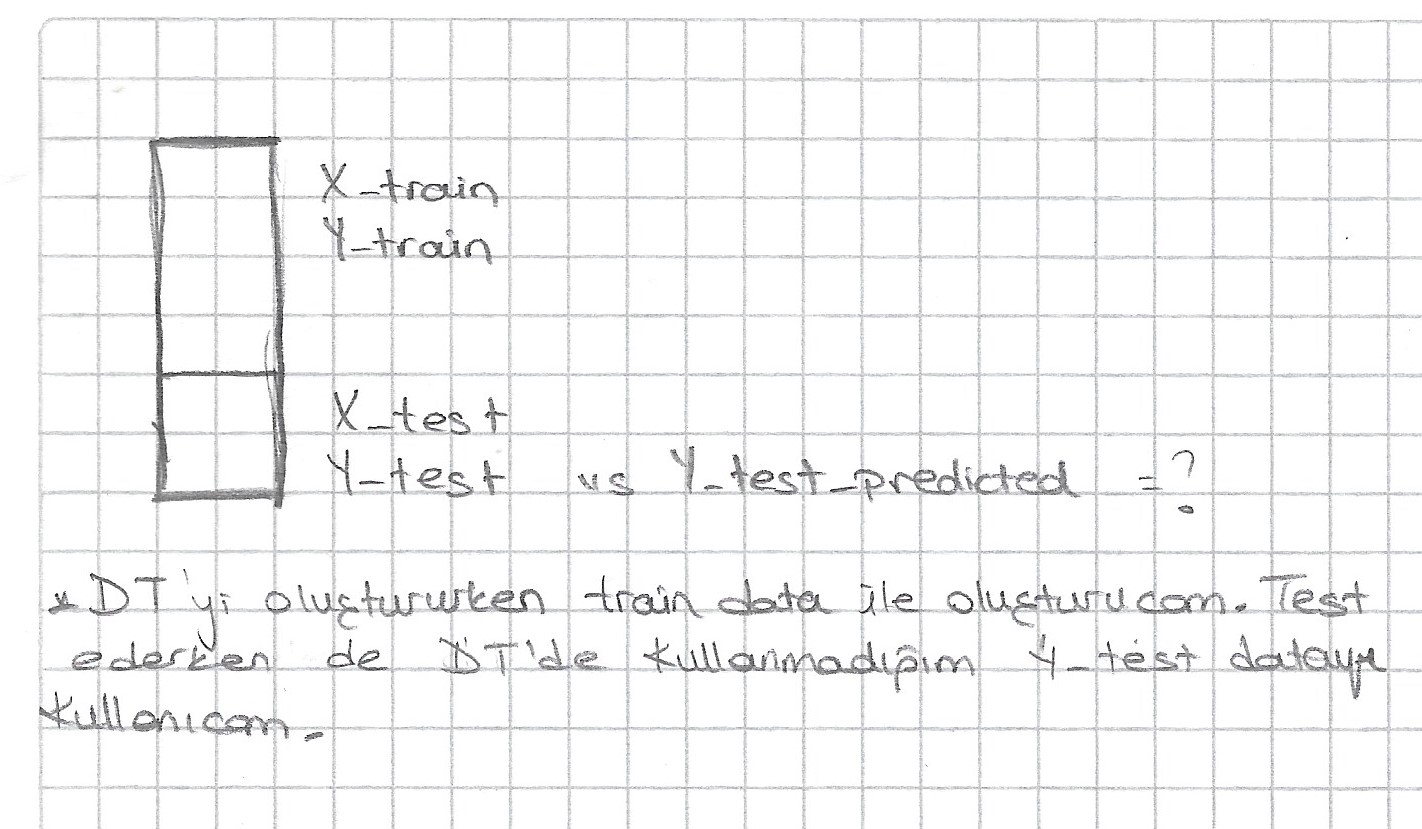

In [ ]:
#simdi train testing ayirip yapicaz
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

mymachine_1=KNeighborsClassifier(n_neighbors=5,weights='uniform')
mymachine_1.fit(X_train,Y_train)

Y_test_predicted=mymachine_1.predict(X_test)

print(confusion_matrix(Y_test,Y_test_predicted))

print(precision_recall_fscore_support(Y_test,Y_test_predicted))


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
(array([1., 1., 1.]), array([1., 1., 1.]), array([1., 1., 1.]), array([13, 16,  9]))


**NOT:** Yukaridaki kod blogunu her calistirdigimda train datayi yeniden analiz ettiginden cikti degisecek

In [ ]:
#testing data size' i degistiriyoruz ,sacmalamasi lazim
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.90)
#0.9 ideal degil 0.25 guzeldir
mymachine_1=KNeighborsClassifier(n_neighbors=5,weights='uniform')
mymachine_1.fit(X_train,Y_train)

Y_test_predicted=mymachine_1.predict(X_test)

print(confusion_matrix(Y_test,Y_test_predicted))

print(precision_recall_fscore_support(Y_test,Y_test_predicted))
#sonuc olarak sacmaladi

[[44  0  0]
 [ 0 42  2]
 [ 0 13 34]]
(array([1.        , 0.76363636, 0.94444444]), array([1.        , 0.95454545, 0.72340426]), array([1.        , 0.84848485, 0.81927711]), array([44, 44, 47]))


**Confusion Matrix with DT**

In [ ]:
# DT ile deniyoruz
from sklearn.tree import DecisionTreeClassifier

#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
mymachine_2=DecisionTreeClassifier(criterion='gini',max_depth=20)
mymachine_2.fit(X_train,Y_train)

Y_test_predicted=mymachine_2.predict(X_test)


print(confusion_matrix(Y_test,Y_test_predicted))
print(precision_recall_fscore_support(Y_test,Y_test_predicted))

[[16  0  0]
 [ 0  9  1]
 [ 0  0 12]]
(array([1.        , 1.        , 0.92307692]), array([1. , 0.9, 1. ]), array([1.        , 0.94736842, 0.96      ]), array([16, 10, 12]))


KNN DT NEDEN FARKLI?????
<br>Hangisini kullanmaliyim

---
boyle olunca birden fazla dt kullaniyoruz bosting bagging haftaya gorcez onu


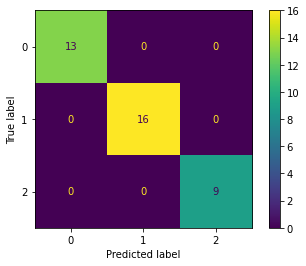

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test,Y_test_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#sadece gorsellestirmeye yariyor

# ustteki kod bloklarindan en son hangisini run ettiysen onu gorsellestiriyor
#ben en son knn ile yaptigimi run ettigim icin onu bana gorsellestirdi
